# Hierarchical Clustering

## 1. Introduction
Hierarchical Clustering is an **unsupervised learning algorithm** that builds a hierarchy of clusters.
Unlike K-Means, it does not require the number of clusters (`k`) to be specified in advance.

There are two main approaches:
- **Agglomerative (Bottom-Up)**:
  Each point starts as its own cluster, and clusters are merged step by step.
- **Divisive (Top-Down)**:
  All points start in one cluster, and clusters are split recursively.

Most implementations use **Agglomerative Clustering**.

## 2. Linkage Criteria
When merging clusters, different distance measures (linkage methods) can be used:
- **Single Linkage**: minimum distance between points.
- **Complete Linkage**: maximum distance between points.
- **Average Linkage**: average distance between points.
- **Ward’s Method**: minimizes variance (most commonly used).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg.fit_predict(X_scaled)

In [7]:
X_with_clusters = pd.DataFrame(X_scaled, columns=data.feature_names)
X_with_clusters["Cluster"] = labels
print(X_with_clusters.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


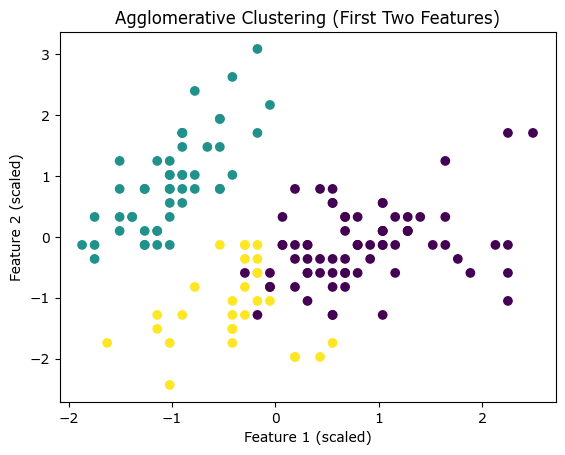

In [8]:
plt.scatter(X_with_clusters.iloc[:, 0], X_with_clusters.iloc[:, 1],
            c=X_with_clusters["Cluster"], cmap="viridis")
plt.title("Agglomerative Clustering (First Two Features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

# Dendogram

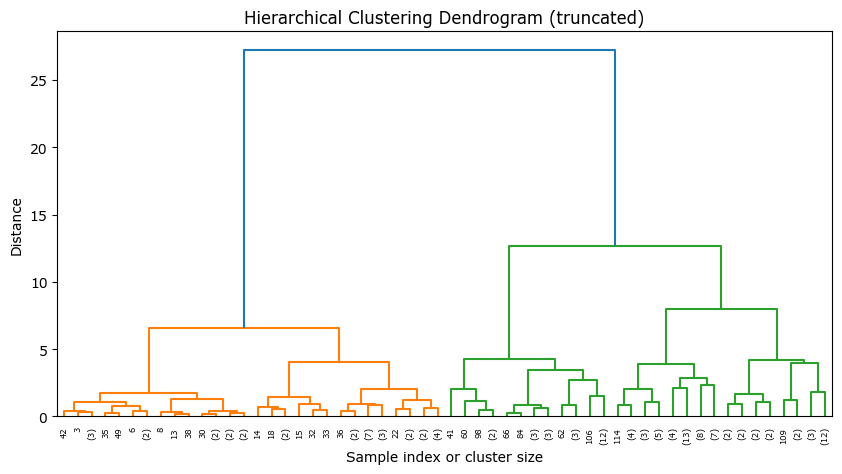

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_scaled, method="ward")
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.show()